In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
file_path = '/content/sample_data/age_gender.csv'

age_gender = pd.read_csv(file_path)

# Display the first few rows of the dataset
age_gender.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
age_gender['pixels'] = age_gender['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
age_gender.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [4]:
X = np.array(age_gender['pixels'].tolist())
X.shape

(23705, 2304)

In [5]:
X = X.reshape(-1,48,48,1)

In [6]:
y = age_gender['gender']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Normalize the pixel values
X_train = X_train / 255.0
X_val = X_test / 255.0

# Convert labels to categorical
y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_test, 2)

In [9]:
# Define the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Binary classification (male/female)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/5
593/593 [==============================] - 78s 130ms/step - loss: 0.4584 - accuracy: 0.7771 - val_loss: 0.3406 - val_accuracy: 0.8486
Epoch 2/5
593/593 [==============================] - 72s 122ms/step - loss: 0.3362 - accuracy: 0.8532 - val_loss: 0.3191 - val_accuracy: 0.8597
Epoch 3/5
593/593 [==============================] - 74s 125ms/step - loss: 0.2963 - accuracy: 0.8694 - val_loss: 0.2903 - val_accuracy: 0.8745
Epoch 4/5
593/593 [==============================] - 74s 126ms/step - loss: 0.2677 - accuracy: 0.8824 - val_loss: 0.2637 - val_accuracy: 0.8861
Epoch 5/5
593/593 [==============================] - 71s 119ms/step - loss: 0.2492 - accuracy: 0.8918 - val_loss: 0.2668 - val_accuracy: 0.8842


In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy*100:.2f}%')


149/149 [==============================] - 4s 28ms/step - loss: 0.2668 - accuracy: 0.8842
Validation Accuracy: 88.42%


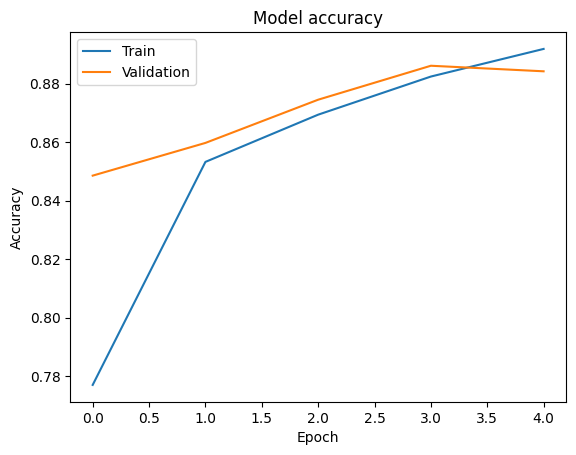

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

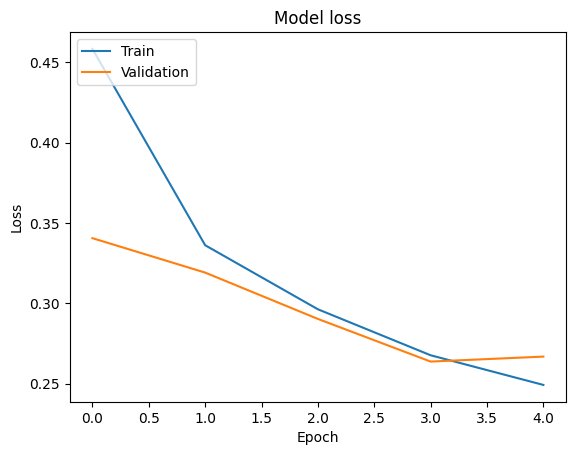

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
# Data Augmentation: Increases the diversity of the training data by applying random transformations
# such as rotations, shifts, flips, and zooms to the images during training, helping the model generalize better.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

In [15]:
# Batch Normalization: Normalizes the inputs of each layer to have a mean of zero and a standard deviation of one.
# This helps to stabilize and speed up the training process, and can also act as a regularizer to reduce overfitting.
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 units and softmax activation for binary classification
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs = 5,
    validation_data=(X_val, y_val)
)

Epoch 1/5
593/593 [==============================] - 113s 184ms/step - loss: 0.6657 - accuracy: 0.6540 - val_loss: 0.4769 - val_accuracy: 0.7690
Epoch 2/5
593/593 [==============================] - 106s 178ms/step - loss: 0.5181 - accuracy: 0.7495 - val_loss: 0.4934 - val_accuracy: 0.7576
Epoch 3/5
593/593 [==============================] - 106s 178ms/step - loss: 0.4512 - accuracy: 0.7892 - val_loss: 0.3751 - val_accuracy: 0.8304
Epoch 4/5
593/593 [==============================] - 103s 173ms/step - loss: 0.4139 - accuracy: 0.8145 - val_loss: 0.4457 - val_accuracy: 0.7880
Epoch 5/5
593/593 [==============================] - 104s 175ms/step - loss: 0.3934 - accuracy: 0.8252 - val_loss: 0.3618 - val_accuracy: 0.8401


In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

149/149 [==============================] - 5s 33ms/step - loss: 0.3618 - accuracy: 0.8401
Validation Accuracy: 84.01%


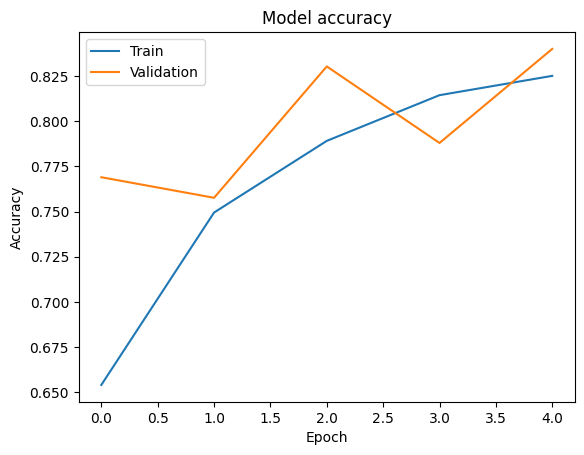

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

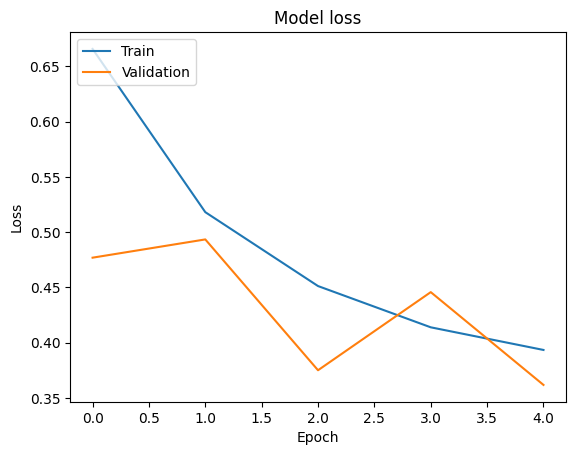

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()